### Multi-Variable Data calculation & Visualization

Documentation:\
https://cantera.org/dev/python/thermo.html \
https://cantera.org/dev/examples/python/thermo/equations_of_state.html \
www.coolprop.org/coolprop/HighLevelAPI.html

In [19]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI

In [20]:
# Now constant p, only varying T

gas_ideal = ct.Solution('gri30.yaml',thermo='ideal-gas')
gas_RK = ct.Solution('gri30.yaml',thermo='R-K')
gas_ideal.TP = 300,1013250
gas_RK.TP = 300,1013250
O2_ideal = gas_ideal.species(gas_ideal.species_index('O2'))
O2_RK = gas_RK.species(gas_RK.species_index('O2'))

T_list = np.linspace(200, 2000, 100)
cp_ideal_list = []
cp_RK_list = []
cp_CoolProp_list = []

for T in T_list:
    cp_m=O2_ideal.thermo.cp(T)/1000 # kJ/kmol/K
    cp_ideal_list.append(cp_m)
    
    cp_m=O2_RK.thermo.cp(T)/1000 # kJ/kmol/K
    cp_RK_list.append(cp_m)

    cp_CoolProp = PropsSI("CPMOLAR", "P", 1013250, "T", T, "O2")
    cp_CoolProp_list.append(cp_CoolProp)

print(cp_ideal_list)
print(cp_RK_list)

[29.140039802388188, 29.135427487654248, 29.155211591625154, 29.19737341991256, 29.259965013908342, 29.341109150784547, 29.438999343493418, 29.55189984076739, 29.678145627119097, 29.816142422841356, 29.964366684007178, 30.12136560246977, 30.285757105862533, 30.456229857599045, 30.631543256873094, 30.810527438658642, 30.992083273709884, 31.175182368561128, 31.35886706552695, 31.54225044270211, 31.724516313961512, 31.904919228960285, 32.08278447313375, 32.25750806769741, 32.42855676964697, 32.595468071758326, 32.75785020258756, 32.91538212647094, 33.06781354352494, 33.21496488964623, 33.356727336511646, 33.493062791578254, 33.624003898083274, 33.749654035044145, 33.87018731725846, 33.985848595304056, 34.096953455538944, 34.203888220101305, 34.30710994690951, 34.407146429662205, 34.504596197838076, 34.600128516696174, 34.69448338727558, 34.7884715463957, 34.882974438386846, 34.959195304525466, 35.03402572561833, 35.10750180881962, 35.179659188688454, 35.25053302718876, 35.32015801368936, 

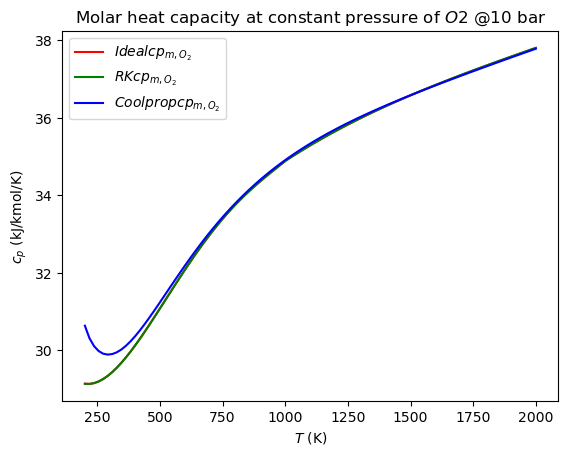

In [21]:
#Plot the results
plt.plot(T_list,cp_ideal_list, label='$Ideal cp_{m,O_2}$', color = 'r')
plt.plot(T_list,cp_RK_list, label='$RK cp_{m,O_2}$', color = 'g')
plt.plot(T_list,cp_CoolProp_list, label='$Coolprop cp_{m,O_2}$', color = 'b')
plt.xlabel('$T$ (K)')
plt.ylabel('$c_p$ (kJ/kmol/K)')
plt.title('Molar heat capacity at constant pressure of $O2$ @10 bar')
plt.legend()

That worked!

In [50]:
# The following is modified code from
# https://cantera.org/dev/examples/python/thermo/equations_of_state.html

# We are varying T as well as p in size-adjusted arrays

# Input parameters
# Set up arrays for pressure and temperature
p_array = np.linspace(10, 500, 8, endpoint=True)
T_array = np.linspace(200, 800, 7)  # Temperature is varied from 200K to 400K
p_array = 1e5 * np.array(p_array)[:, np.newaxis]

# Calculate cp for Ideal gas
ideal_gas_phase = ct.Solution('gri30.yaml',thermo='ideal-gas')
states = ct.SolutionArray(ideal_gas_phase, shape=(p_array.size, T_array.size))
states.TP = T_array, p_array
cp_ideal = states.cp_mole / 1000
#print(cp_ideal)
# No change of cp with pressure, ideal gas and all...


#cp for R-K EOS
redlich_kwong_phase = ct.Solution('gri30.yaml',thermo='R-K')
states = ct.SolutionArray(redlich_kwong_phase, shape=(p_array.size, T_array.size))
states.TP = T_array, p_array
cp_RK = states.cp_mole / 1000
#print(cp_RK )
#Why is RK identical to ideal?


#cp in CoolProp
p, T = np.meshgrid(p_array, T_array)
cp_coolprop = PropsSI("CPMOLAR", "P", np.ravel(p), "T", np.ravel(T), "O2")
cp_coolprop = cp_coolprop.reshape(p.shape)
print(cp_coolprop)

#cp in CoolProp, using RK backend
p, T = np.meshgrid(p_array, T_array)
cp_coolpropRK = PropsSI("CPMOLAR", "P", np.ravel(p), "T", np.ravel(T), "SRK::O2")
cp_coolpropRK = cp_coolpropRK.reshape(p.shape)
print(cp_coolpropRK)

[[30.61492402 51.17343146 70.98952533 61.79499734 55.51217665 51.95757651
  49.72519797 48.19862241]
 [29.88702865 33.6534836  37.31991811 40.09648585 41.68734756 42.34447208
  42.4548181  42.29814379]
 [30.35701396 32.07056722 33.625048   34.92853553 35.94785426 36.70002972
  37.22939727 37.58692999]
 [31.24044275 32.22691918 33.11141472 33.87653975 34.51906066 35.04635246
  35.47182347 35.81108275]
 [32.18910349 32.82647579 33.4000028  33.9061963  34.34611959 34.72408077
  35.04624864 35.31952135]
 [33.05163754 33.4939546  33.89515487 34.25484826 34.57443426 34.85655819
  35.10458297 35.32215936]
 [33.78629568 34.10890714 34.40417105 34.67235013 34.91453745 35.13239701
  35.32792412 35.50325077]]
[[30.61068299 50.84981605 67.971675   61.86041349 56.71799888 53.46572323
  51.27381769 49.69687651]
 [29.94473389 34.01139503 37.73764813 40.45327985 42.06011217 42.84619874
  43.13574636 43.15453691]
 [30.39071332 32.27505362 33.91426878 35.26050755 36.31801271 37.12242959
  37.72069536 38

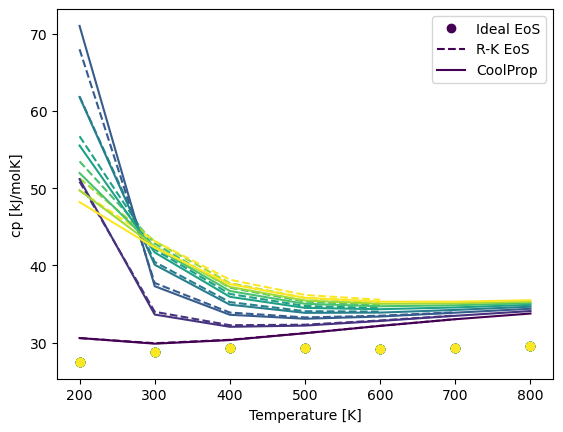

In [51]:
# Plot using cycler
import cycler
color = plt.cm.viridis(np.linspace(0, 1, p_array.size))
plt.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)
fig, ax = plt.subplots()
ideal_line = ax.plot(T_array, cp_ideal.T, "o", label="Ideal EoS")
RK_line = ax.plot(T_array, cp_coolpropRK, "--", label="R-K EoS")
CP_line = ax.plot(T_array, cp_coolprop, "-", label="CoolProp")
ax.set_ylabel("cp [kJ/molK]")
ax.set_xlabel("Temperature [K]")
ax.legend(handles=[ideal_line[0], RK_line[0], CP_line[0]])

#Looks good, however its strange that the coolprop SRK backend fails at high p+T pairings (retuns inf)